# 1. Data input

### 1.1 Read the metadata table (clusters_df): strain name and paths of their mortality data .pickles

### 1.2 Locate mortality clusters

### 1.3 Filter out cluster choice mistakes

### 1.4 Drop data known to not fit GGM

### 1.5 Load mortality .pickles (pip install pandas==0.19.2)

# 2. Redo statistical mortality analysis and quality control

### 2.1 Fit to GG or GGM

In [1]:
%cd '/app/src/ms2_post_analysis'
import dill
dill_file = open("./dill/Fitted.p", "rb")
Fitted_from_file = dill.load(dill_file)
dill_file.close()
Fitted = Fitted_from_file

dill_file = open("./dill/stats.p", "rb")
stats_from_file = dill.load(dill_file)
dill_file.close()
stats = stats_from_file

dill_file = open("./dill/dfs_mortality.p", "rb")
dfs_from_file = dill.load(dill_file)
dill_file.close()
dfs_mortality = dfs_from_file

dill_file = open("./dill/tgs_mortality.p", "rb")
tgs_from_file = dill.load(dill_file)
dill_file.close()
tgs_mortality = tgs_from_file

dill_file = open("./dill/quantiles.p", "rb")
quantiles_from_file = dill.load(dill_file)
dill_file.close()
quantiles = quantiles_from_file

dill_file = open("./dill/KStests.p", "rb")
KStests_from_file = dill.load(dill_file)
dill_file.close()
KStests = KStests_from_file

/app/src/ms2_post_analysis


In [2]:
strain_error = ['ydjQ', 'ybaJ', 'uxuR', 'yiaW', 'hslR', 'uxaC']
strain_error

['ydjQ', 'ybaJ', 'uxuR', 'yiaW', 'hslR', 'uxaC']

### 2.2 Generate bootstrapped statistics: Medians, GGM parameters

### 2.3 Goodness-of-fit by K-S statistics & quality control

### These data cross K-S thresholds, but only in very few time points, thus pass quality control

In [3]:
for strain in Fitted.keys():
    if strain in strain_error:
        print "jump ", strain
        continue
    if KStests[strain][0] > 1.517:
        print strain, KStests[strain]

norV KstestResult(statistic=1.527911284934915, pvalue=0.01839849899610042, critical_stat=1.6252092349398368)
80%20MG%20yagS KstestResult(statistic=1.870992574195027, pvalue=0.001821528591744746, critical_stat=1.627623630718729)
jump  ydjQ
lsrC KstestResult(statistic=1.562344350904738, pvalue=0.015166100667016562, critical_stat=1.627623630718729)
ptsH KstestResult(statistic=1.7420232174035264, pvalue=0.004625630469956536, critical_stat=1.6276236305626721)
yagH KstestResult(statistic=1.6310413664621568, pvalue=0.008691198840334318, critical_stat=1.6091234244094257)
ydcP KstestResult(statistic=2.330143092803433, pvalue=3.8456358647840585e-05, critical_stat=1.6276195692566895)
80%20MG%20pgi KstestResult(statistic=1.7012837471272915, pvalue=0.006123719559480749, critical_stat=1.6276236307187228)
ygjP KstestResult(statistic=2.0100870630558996, pvalue=0.0006187849123886392, critical_stat=1.6276236249018332)
fruR KstestResult(statistic=1.525101053600419, pvalue=0.019087544695554546, critical_s

### Mortality cluster with too few imaging positions, dropped later

In [4]:
import numpy as np
for strain in dfs_mortality.keys():
    if strain in strain_error:
        print "jump ", strain
        continue
    if len(np.unique(dfs_mortality[strain]['fn'])) < 3:
        print strain

jump  ydjQ
ydjK
gspM
mprA
melA
jump  ybaJ
dcuA
bglF
gnsA
gltK
jump  uxuR
yjfJ
ybgD
rsd
70%20thiQ
jump  yiaW
xdhC
ycfX
glpX
jump  hslR
uxaA
jump  uxaC


### 2.4 Important Quantiles

# 3. Aging parameters basics: first figures

### 3.1 Set basic info for plotting: strain aging parameters dataframe (strain_df) and strain categories

In [5]:
import pandas as pd
strain_df = pd.DataFrame(index=Fitted.keys(), columns=['med_exp','med_model','scale','med_ratio','scale_ratio'])
for strain in Fitted.keys():
    if strain in strain_error:
        print "jump ", strain
        continue
    strain_df.loc[strain,'med_model'] = float(np.median(stats[strain]['median']))
    strain_df.loc[strain,'med_ratio'] = float(np.median(stats[strain]['median'])/np.median(stats['MG-WT']['median']))
    strain_df.loc[strain,'scale'] = float(1/Fitted[strain]['model_paras'].loc['rate','est'])
    strain_df.loc[strain,'scale_ratio'] = float(Fitted['MG-WT']['model_paras'].loc['rate','est']/Fitted[strain]['model_paras'].loc['rate','est'])
    strain_df.loc[strain,'rate'] = Fitted[strain]['model_paras'].loc['rate','est']
    strain_df.loc[strain,'rate_L95%'] = Fitted[strain]['model_paras'].loc['rate','L95%']
    strain_df.loc[strain,'rate_U95%'] = Fitted[strain]['model_paras'].loc['rate','U95%']
    strain_df.loc[strain,'beta'] = Fitted[strain]['model_paras'].loc['beta','est']
    strain_df.loc[strain,'beta_L95%'] = Fitted[strain]['model_paras'].loc['beta','L95%']
    strain_df.loc[strain,'beta_U95%'] = Fitted[strain]['model_paras'].loc['beta','U95%']
    strain_df.loc[strain,'s'] = Fitted[strain]['model_paras'].loc['s','est']
    strain_df.loc[strain,'s_L95%'] = Fitted[strain]['model_paras'].loc['s','L95%']
    strain_df.loc[strain,'s_U95%'] = Fitted[strain]['model_paras'].loc['s','U95%']
    strain_df.loc[strain,'model type'] = Fitted[strain]['type']
    if Fitted[strain]['type'] == 'GGM':
        strain_df.loc[strain,'lambda'] = Fitted[strain]['model_paras'].loc['lambda','est']
        strain_df.loc[strain,'lambda_L95%'] = Fitted[strain]['model_paras'].loc['lambda','L95%']
        strain_df.loc[strain,'lambda_U95%'] = Fitted[strain]['model_paras'].loc['lambda','U95%']
    elif Fitted[strain]['type'] == 'GG':
        strain_df.loc[strain,'lambda'] = 0
        strain_df.loc[strain,'lambda_L95%'] = 0
        strain_df.loc[strain,'lambda_U95%'] = 0

jump  ydjQ
jump  ybaJ
jump  uxuR
jump  yiaW
jump  hslR
jump  uxaC


Text(0,0.5,'relative longevity')

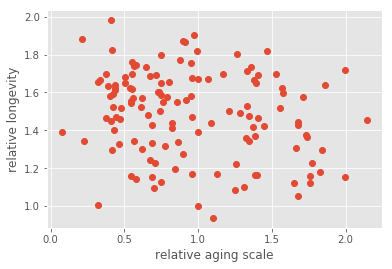

In [6]:
import matplotlib as mpl
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
#import seaborn as sns
plt.plot(strain_df['scale_ratio'], strain_df['med_ratio'],'o')
#plt.xscale('log')
plt.xlabel('relative aging scale')
#plt.yscale('log')
plt.ylabel('relative longevity')

### 3.2 Aging parameter space: lifespan, aging timescale, shape

__**shape = lifespan / scale**__

In [7]:
#candidates = ['ompL_new','pgi','uxaB_new','aqpZ','ascG','caiT_new','yagS','yfiD_new', 'appY']

strain_df['scale_ratio_log2'] = [np.log2(float(r)) for r in strain_df['scale_ratio']]
strain_df['lifespan_ratio_log2'] = [np.log2(float(r)) for r in strain_df['med_ratio']]
strain_df['shape_ratio_log2'] = [np.log2(float(r)) for r in strain_df['med_ratio']/strain_df['scale_ratio']]

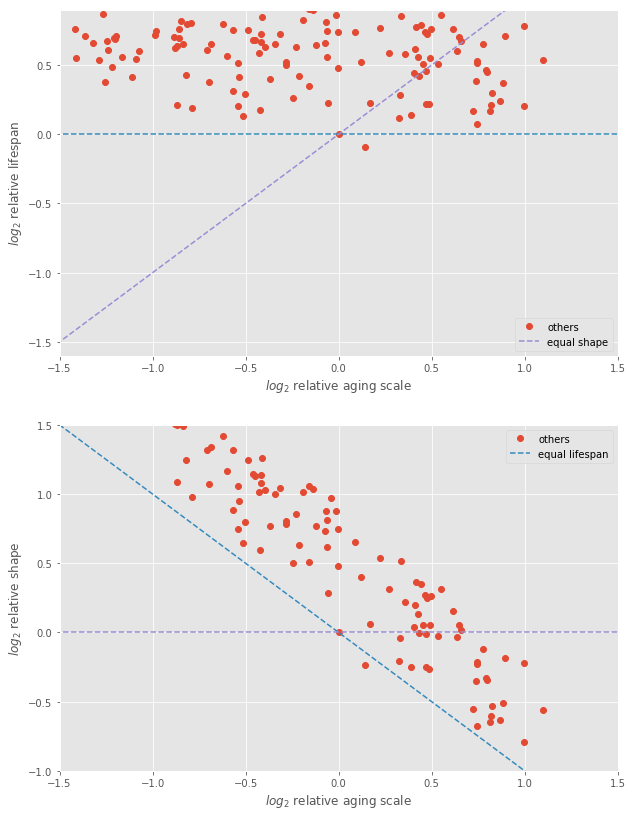

In [8]:
f, (ax1, ax2) = plt.subplots(2, sharex=False)

ax1.plot(strain_df['scale_ratio_log2'], 
         strain_df['lifespan_ratio_log2'],
         'o',label='others')
#ax1.plot(strain_df.loc[candidates, 'scale_ratio_log2'],
#         strain_df.loc[candidates, 'lifespan_ratio_log2'], 'o', label='candidates')
ax1.set_ylabel('$log_2$ relative lifespan')
ax1.set_xlabel('$log_2$ relative aging scale')
ax1.plot(np.arange(4,-4,-0.1), [0]*80, '--')
ax1.plot(np.arange(2,-3,-0.1), np.arange(2,-3,-0.1), '--', label='equal shape')
ax1.legend(loc=4)


ax2.plot(strain_df['scale_ratio_log2'], 
         strain_df['shape_ratio_log2'],
         'o',label='others')
#ax2.plot(strain_df.loc[candidates, 'scale_ratio_log2'],
#         strain_df.loc[candidates, 'shape_ratio_log2'], 'o', label='candidates')
ax2.set_xlabel('$log_2$ relative aging scale')
ax2.set_ylabel('$log_2$ relative shape ')
ax2.plot(np.arange(3,-4,-0.1), np.arange(-3,4,0.1), '--', label='equal lifespan')
ax2.plot(np.arange(4,-4,-0.1), [0]*80, '--')
ax2.legend(loc=1)

ax1.set_xlim([-1.5,1.5])
ax2.set_xlim([-1.5,1.5])
ax1.set_ylim([-1.6,0.9])
ax2.set_ylim([-1,1.5])


f.set_size_inches(10,14)

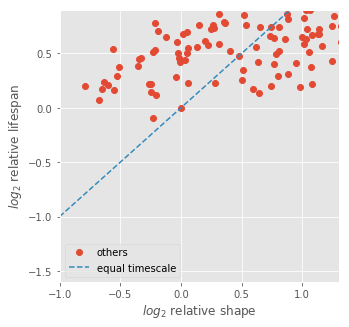

In [9]:
f, (ax1) = plt.subplots(1, sharex=False)

ax1.plot(strain_df['shape_ratio_log2'], 
         strain_df['lifespan_ratio_log2'],
         'o',label='others')
#ax1.plot(strain_df.loc[candidates, 'shape_ratio_log2'],
#         strain_df.loc[candidates, 'lifespan_ratio_log2'], 'o', label='candidates')
ax1.set_xlabel('$log_2$ relative shape')
ax1.set_ylabel('$log_2$ relative lifespan')
ax1.plot(np.arange(-1,1.5,0.1), np.arange(-1,1.5,0.1), '--', label='equal timescale')
ax1.legend(loc=3)

ax1.set_ylim([-1.6,0.9])
ax1.set_xlim([-1,1.3])


f.set_size_inches(5,5)

### 3.3 Longevity strains as candidate strains

In [10]:
#strain_df.loc[candidates,['scale_ratio_log2','lifespan_ratio_log2','shape_ratio_log2']]

In [11]:
strain_df.loc[strain_df['lifespan_ratio_log2']>0.4,['scale_ratio_log2','lifespan_ratio_log2','shape_ratio_log2']]

,scale_ratio_log2,lifespan_ratio_log2,shape_ratio_log2
yihV%202,0.120459,0.523195,0.402736
norW,-0.599195,0.565141,1.164336
norV,-1.198274,0.711431,1.909705
bipA,0.532535,0.506582,-0.025953
ssuE%202,-1.111346,0.411870,1.523216
yoaF,0.494770,0.760847,0.266077
ulaD,-0.624050,0.795252,1.419302
ycaD,0.792539,0.461605,-0.330935
nagZ,0.657077,0.677505,0.020428
sspA,-0.537939,0.415037,0.952976


# 4. Aging parameter C.I.s

### 4.1 Median lifespan: medians estimated non-parametrically from Kaplan-Meier, versus parametrically from GGM

In [12]:
from cohortMortalitySummary import KaplanMeier
def surv_prob_median(surv):
    return (surv.index[surv<0.5][0] + surv.index[surv>0.5][-1])*0.5
for strain in Fitted.keys():
    if strain in strain_error:
        print "jump ", strain
        continue
    KM = KaplanMeier(dfs_mortality[strain], tgs_mortality[strain])
    if KM['upper_ci'].iloc[-1]>0.5:
        print strain
    else:
        strain_df.loc[strain,'med_exp'] = surv_prob_median( KM['survivorship'] )
        strain_df.loc[strain,'med_exp_U95%'] = surv_prob_median( KM['upper_ci'] )
        strain_df.loc[strain,'med_exp_L95%'] = surv_prob_median( KM['lower_ci'] )
    

jump  ydjQ
jump  ybaJ
jump  uxuR
jump  yiaW
jump  hslR
jump  uxaC


Text(0,0.5,'model median lifespan (h)')

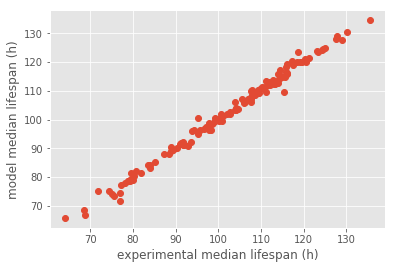

In [13]:
plt.plot([float(r) for r in strain_df['med_model']], strain_df['med_exp'],'o')
plt.xlabel('experimental median lifespan (h)')
plt.ylabel('model median lifespan (h)')


### 4.2 Calculating C.I.s of aging statistics from bootstrapped GGM parameters

In [14]:
for strain in Fitted.keys():
    if strain in strain_error:
        print "jump ", strain
        continue
    stats[strain]['smed'] = stats[strain]['median']*stats[strain]['rate']

for strain in Fitted.keys():
    if strain in strain_error:
        print "jump ", strain
        continue
    stats[strain]['inverse_eta'] = stats[strain]['beta']/stats[strain]['s']
    strain_df.loc[strain, 'inverse_eta'] = np.median(stats[strain]['beta']/stats[strain]['s'])
    strain_df.loc[strain,'model_type'] = Fitted[strain]['type']
    strain_df.loc[strain,'shape_exp'] = strain_df.loc[strain,'med_exp']*strain_df.loc[strain,'rate']
    strain_df.loc[strain,'shape_med'] = np.median(stats[strain]['median']*stats[strain]['rate'])
    
    strain_df.loc[strain,'med_model_L95%'] = 0.5*(np.sort(stats[strain]['median'])[int(np.floor(len(stats[strain]['median'])*0.025))]+np.sort(stats[strain]['median'])[1+int(np.floor(len(stats[strain]['median'])*0.025))])
    strain_df.loc[strain,'med_model_U95%'] = 0.5*(np.sort(stats[strain]['median'])[int(np.floor(len(stats[strain]['median'])*0.975))]+np.sort(stats[strain]['median'])[1+int(np.floor(len(stats[strain]['median'])*0.975))])
    
    strain_df.loc[strain,'shape_med_L95%'] = 0.5*(np.sort(stats[strain]['smed'])[int(np.floor(len(stats[strain]['smed'])*0.025))]+np.sort(stats[strain]['smed'])[1+int(np.floor(len(stats[strain]['smed'])*0.025))])
    strain_df.loc[strain,'shape_med_U95%'] = 0.5*(np.sort(stats[strain]['smed'])[int(np.floor(len(stats[strain]['smed'])*0.975))]+np.sort(stats[strain]['smed'])[1+int(np.floor(len(stats[strain]['smed'])*0.975))])
    
strain_df['shape_eta'] = [np.log(s*np.log(2)+1) for s in strain_df['inverse_eta']]

strain_df['scale_ratio_log2'] = [np.log2(float(r)) for r in strain_df['scale_ratio']]
strain_df['scale_ratio_log2_L95%'] = np.log2(strain_df.loc['MG-WT','rate'])-np.log2(strain_df.loc[:,'rate_U95%'])
strain_df['scale_ratio_log2_U95%'] = np.log2(strain_df.loc['MG-WT','rate'])-np.log2(strain_df.loc[:,'rate_L95%'])
strain_df['lifespan_ratio_log2'] = np.log2([lf/strain_df.loc['MG-WT','med_exp'] for lf in strain_df.loc[:,'med_exp']])
strain_df['lifespan_ratio_log2_L95%'] = np.log2(strain_df.loc[:,'med_exp_L95%']/strain_df.loc['MG-WT','med_exp'])
strain_df['lifespan_ratio_log2_U95%'] = np.log2(strain_df.loc[:,'med_exp_U95%']/strain_df.loc['MG-WT','med_exp']) 
strain_df['shape_ratio_log2'] = [np.log2(float(r)) for r in strain_df['med_ratio']/strain_df['scale_ratio']]
strain_df['shape_ratio_log2_L95%'] = np.log2(strain_df.loc[:,'shape_med_L95%']/strain_df.loc['MG-WT','shape_med'])
strain_df['shape_ratio_log2_U95%'] = np.log2(strain_df.loc[:,'shape_med_U95%']/strain_df.loc['MG-WT','shape_med'])

jump  ydjQ
jump  ybaJ
jump  uxuR
jump  yiaW
jump  hslR
jump  uxaC
jump  ydjQ
jump  ybaJ
jump  uxuR
jump  yiaW
jump  hslR
jump  uxaC


### 4.3 Drop data with too few imaging positions to avoid large C.I.s

In [15]:
for strain in dfs_mortality.keys():
    if strain in strain_error:
        print "jump ", strain
        continue
    if len(np.unique(dfs_mortality[strain]['fn'])) < 3:
        print strain
        strain_df.drop(strain, inplace=True)

jump  ydjQ
ydjK
gspM
mprA
melA
jump  ybaJ
dcuA
bglF
gnsA
gltK
jump  uxuR
yjfJ
ybgD
rsd
70%20thiQ
jump  yiaW
xdhC
ycfX
glpX
jump  hslR
uxaA
jump  uxaC


### 4.4 Classify and plot strains based on significant differences in aging parameters

In [16]:
for strain in strain_df.index:
    for trait in ['rate', 'med_exp', 'shape_med']:
        if strain_df.loc[strain, trait+'_U95%'] < strain_df.loc['MG-WT', trait+'_L95%']:
            strain_df.loc[strain, trait+'_overlap_wt'] = -1
        elif strain_df.loc[strain, trait+'_L95%'] > strain_df.loc['MG-WT', trait+'_U95%']:
            strain_df.loc[strain, trait+'_overlap_wt'] = 1
        else:
            strain_df.loc[strain, trait+'_overlap_wt'] = 0

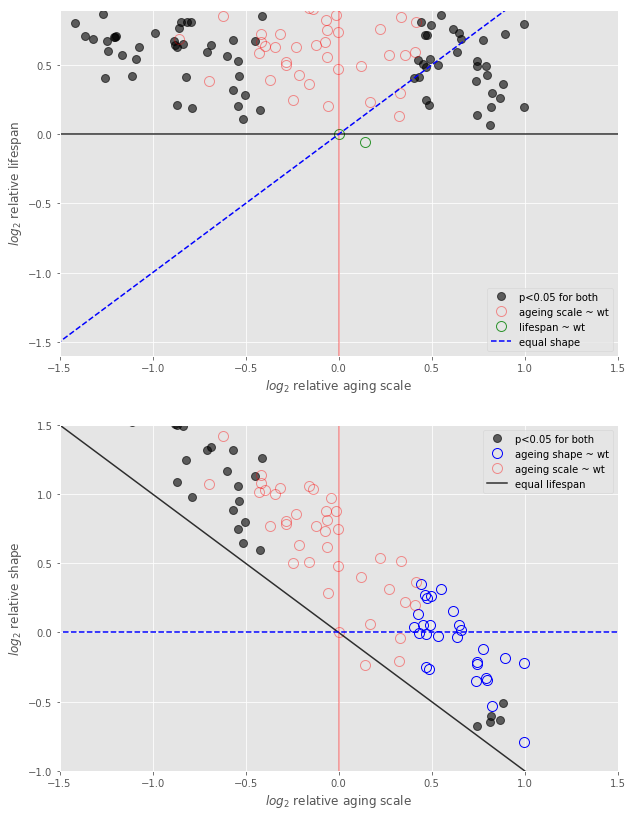

In [17]:
#candidates = ['ompL_new','pgi','uxaB_new','aqpZ','ascG','caiT_new','yagS','yfiD_new', 'appY']
rate_diff = set(strain_df.index[strain_df['rate_overlap_wt']!=0])
rate_non = set(strain_df.index[strain_df['rate_overlap_wt']==0])
lifespan_diff = set(strain_df.index[strain_df['med_exp_overlap_wt']!=0])
lifespan_non = set(strain_df.index[strain_df['med_exp_overlap_wt']==0])
shape_diff = set(strain_df.index[strain_df['shape_med_overlap_wt']!=0])
shape_non = set(strain_df.index[strain_df['shape_med_overlap_wt']==0])

f, (ax1, ax2) = plt.subplots(2, sharex=False)

ax1.plot(strain_df.loc[set.intersection(rate_diff, lifespan_diff),'scale_ratio_log2'], 
         strain_df.loc[set.intersection(rate_diff, lifespan_diff),'lifespan_ratio_log2'],
         'o',label='p<0.05 for both', color='k', markersize=8, alpha=0.6)
#ax1.plot(strain_df.loc[candidates,'scale_ratio_log2'], 
#         strain_df.loc[candidates,'lifespan_ratio_log2'],
#         '.',label='candidates', color='r', markersize=6)
ax1.plot(strain_df.loc[set.difference(rate_non, lifespan_non), 'scale_ratio_log2'],
         strain_df.loc[set.difference(rate_non, lifespan_non), 'lifespan_ratio_log2'],
         'o',label='ageing scale ~ wt',markerfacecolor='none', markeredgecolor='r', alpha=0.4, markersize=10)
ax1.plot(strain_df.loc[lifespan_non, 'scale_ratio_log2'],
         strain_df.loc[lifespan_non, 'lifespan_ratio_log2'],
         'o',label='lifespan ~ wt', markerfacecolor='none', markeredgecolor='g', alpha=0.8, markersize=10)

ax1.set_ylabel('$log_2$ relative lifespan')
ax1.set_xlabel('$log_2$ relative aging scale')
ax1.plot(np.arange(4,-4,-0.1), [0]*80, '-', color='k', alpha=0.8)
ax1.plot( [0]*80, np.arange(4,-4,-0.1), '-', color='r', alpha=0.4)
ax1.plot(np.arange(2,-3,-0.1), np.arange(2,-3,-0.1), '--', color='b', label='equal shape')
ax1.legend(loc=4)


ax2.plot(strain_df.loc[set.intersection(shape_diff, rate_diff),'scale_ratio_log2'], 
         strain_df.loc[set.intersection(shape_diff, rate_diff),'shape_ratio_log2'],
         'o',label='p<0.05 for both', color='k', markersize=8, alpha=0.6)
#ax2.plot(strain_df.loc[candidates,'scale_ratio_log2'], 
#         strain_df.loc[candidates,'shape_ratio_log2'],
#         '.',label='candidates', color='r', markersize=6)
ax2.plot(strain_df.loc[set.difference(shape_non, rate_non), 'scale_ratio_log2'],
         strain_df.loc[set.difference(shape_non, rate_non), 'shape_ratio_log2'],
        'o',label='ageing shape ~ wt',markerfacecolor='none', markeredgecolor='b', markersize=10)
ax2.plot(strain_df.loc[rate_non, 'scale_ratio_log2'],
         strain_df.loc[rate_non, 'shape_ratio_log2'],
        'o',label='ageing scale ~ wt',markerfacecolor='none', markeredgecolor='r', alpha=0.4, markersize=10)
ax2.set_xlabel('$log_2$ relative aging scale')
ax2.set_ylabel('$log_2$ relative shape ')
ax2.plot(np.arange(3,-4,-0.1), np.arange(-3,4,0.1), '-',color='k', alpha=0.8, label='equal lifespan')
ax2.plot( [0]*80, np.arange(4,-4,-0.1), '-', color='r', alpha=0.4)
ax2.plot(np.arange(4,-4,-0.1), [0]*80, '--',color='b')
ax2.legend(loc=1)

ax1.set_xlim([-1.5,1.5])
ax2.set_xlim([-1.5,1.5])
ax1.set_ylim([-1.6,0.9])
ax2.set_ylim([-1,1.5])


f.set_size_inches(10,14)

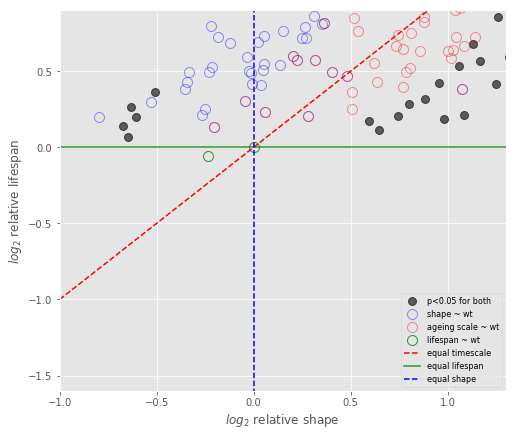

In [18]:
f, (ax1) = plt.subplots(1, sharex=False)

ax1.plot(strain_df.loc[set.difference(set.intersection(shape_diff, lifespan_diff),rate_non),'shape_ratio_log2'], 
         strain_df.loc[set.difference(set.intersection(shape_diff, lifespan_diff),rate_non),'lifespan_ratio_log2'],
         'o',label='p<0.05 for both', color='k', markersize=8, alpha=0.6)
#ax1.plot(strain_df.loc[candidates,'shape_ratio_log2'], 
#         strain_df.loc[candidates,'lifespan_ratio_log2'],
#         '.',label='candidates', color='r', markersize=6)
ax1.plot(strain_df.loc[set.difference(shape_non, lifespan_non), 'shape_ratio_log2'],
         strain_df.loc[set.difference(shape_non, lifespan_non), 'lifespan_ratio_log2'],
         'o',label='shape ~ wt',markerfacecolor='none', markeredgecolor='b', alpha=0.4, markersize=10)
ax1.plot(strain_df.loc[set.difference(rate_non,lifespan_non), 'shape_ratio_log2'],
         strain_df.loc[set.difference(rate_non,lifespan_non), 'lifespan_ratio_log2'],
        'o',label='ageing scale ~ wt',markerfacecolor='none', markeredgecolor='r', alpha=0.4, markersize=10)
ax1.plot(strain_df.loc[lifespan_non, 'shape_ratio_log2'],
         strain_df.loc[lifespan_non, 'lifespan_ratio_log2'],
         'o',label='lifespan ~ wt', markerfacecolor='none', markeredgecolor='g', alpha=0.8, markersize=10)


ax1.set_xlabel('$log_2$ relative shape')
ax1.set_ylabel('$log_2$ relative lifespan')
ax1.plot(np.arange(-1,1.5,0.1), np.arange(-1,1.5,0.1), 'r--', label='equal timescale')
ax1.plot(np.arange(4,-4,-0.1),[0]*80, '-',color='g', alpha=0.8, label='equal lifespan')
ax1.plot([0]*80,np.arange(4,-4,-0.1),  '--',color='b', label='equal shape')
ax1.legend(loc=4, fontsize=8)

ax1.set_ylim([-1.6,0.9])
ax1.set_xlim([-1,1.3])


f.set_size_inches(8,7)

# 5. What is shape? A function of Gompertz intercept

### 5.1 Analytical formulation of shape using Gamma-Gompertz parameters: $ln(\frac{\beta}{s}ln2+1)$

### 5.2 Analytical vs experimental shape

__Experimental shape could be calculated using lifespan distribution without assuming parametric models__

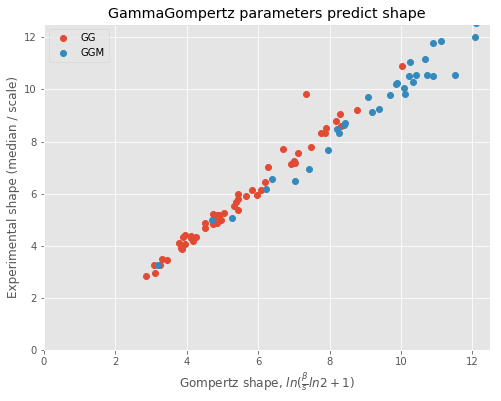

In [19]:
f, ( ax1) = plt.subplots(1, sharex=False)

ax1.plot(strain_df.loc[strain_df['model_type']=='GG','shape_eta'],
         strain_df.loc[strain_df['model_type']=='GG','shape_exp'],'o',label='GG')
ax1.plot(strain_df.loc[strain_df['model_type']=='GGM','shape_eta'],
         strain_df.loc[strain_df['model_type']=='GGM','shape_exp'],'o',label='GGM')
ax1.set_xlabel('Gompertz median')
ax1.set_ylabel('Experimental shape (median / scale)')
ax1.set_xlim([0,12.5])
ax1.set_ylim([0,12.5])
ax1.legend(loc=2)

ax1.set_xlabel(r'Gompertz shape, $ln(\frac{\beta}{s}ln2+1)$')
ax1.set_title('GammaGompertz parameters predict shape')

f.set_size_inches(8,6)

### 5.3 Analytical vs GGM model shape

**Shape can also be calculated using fitted GGM models. Ignoring Makeham term do not make much difference**

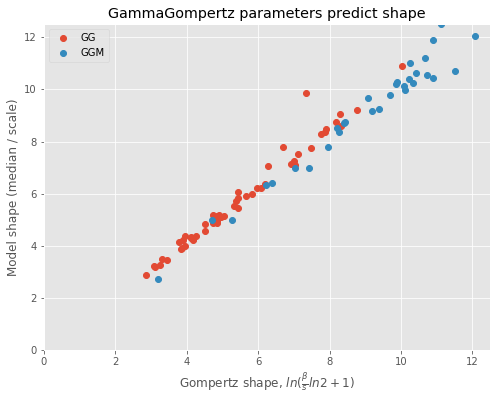

In [20]:
f, ( ax1) = plt.subplots(1, sharex=False)

ax1.plot(strain_df.loc[strain_df['model_type']=='GG','shape_eta'],
         strain_df.loc[strain_df['model_type']=='GG','shape_med'],'o',label='GG')
ax1.plot(strain_df.loc[strain_df['model_type']=='GGM','shape_eta'],
         strain_df.loc[strain_df['model_type']=='GGM','shape_med'],'o',label='GGM')
ax1.set_xlabel('Gompertz median')
ax1.set_ylabel('Model shape (median / scale)')
ax1.set_xlim([0,12.5])
ax1.set_ylim([0,12.5])
ax1.legend(loc=2)

ax1.set_xlabel(r'Gompertz shape, $ln(\frac{\beta}{s}ln2+1)$')

ax1.set_title('GammaGompertz parameters predict shape')

f.set_size_inches(8,6)

### 5.4 Shape and Gompertz intercept $\eta = \frac{\beta}{s}$

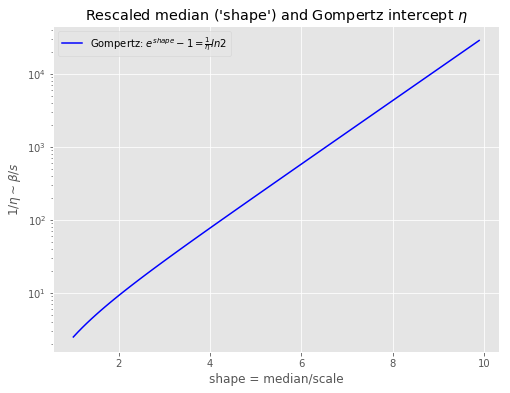

In [21]:
ax2 = plt.gca()
ax2.plot(np.arange(1,10,0.1), [(np.exp(s)-1)/np.log(2) for s in np.arange(1,10,0.1)], 'b',
         label=r'Gompertz: $e^{shape}-1 = \frac{1}{\eta}ln2$')
ax2.set_yscale('log')
ax2.set_ylabel('$1/\\eta \\sim \\beta/s$')
ax2.set_xlabel('shape = median/scale')
ax2.legend(loc=0)
ax2.set_title('Rescaled median (\'shape\') and Gompertz intercept $\eta$')

plt.gcf().set_size_inches(8,6)

## 6. Saving and replotting aging parameters using only initially selected mutants

### 6.0 Saving results so far

In [22]:
strain_df[['scale','scale_ratio','scale_ratio_log2','rate_overlap_wt',
           'med_exp','med_exp_overlap_wt','med_model','med_ratio','lifespan_ratio_log2',
           'shape_med','shape_med_overlap_wt','shape_exp','shape_eta','inverse_eta','shape_ratio_log2']].to_csv('/app/src/ms2_post_analysis/csv/Aging parameters.csv')
strain_df[['scale_ratio_log2','scale','lifespan_ratio_log2','med_exp',
           'shape_ratio_log2','shape_exp',
           'rate_overlap_wt','med_exp_overlap_wt','shape_med_overlap_wt']].to_csv(
                '/app/src/ms2_post_analysis/csv/Mutant effects on aging parameters.csv')

## waiting candidates

In [23]:
#strain_df.loc[['MG-WT']+candidates, ['model type']+
#              list(np.ravel([[trait,trait+'_L95%',trait+'_U95%'] for trait in ['rate','beta','s','lambda']]))].to_csv(
#                '/Users/yyfwuhan/Projects/2018-TaMaRa-Ana-figures/Candidates aging parameters.csv')
#strain_df.loc[['WT']+candidates, ['model type']+
#              list(np.ravel([[trait,trait+'_L95%',trait+'_U95%'] for trait in ['rate','beta','s','lambda']]))]

In [24]:
for strain in Fitted.keys():
    if strain in strain_error:
        print "jump ", strain
        continue
    quantiles[strain].to_csv('/app/src/ms2_post_analysis/bootstrap/'+strain+'.csv')

jump  ydjQ
jump  ybaJ
jump  uxuR
jump  yiaW
jump  hslR
jump  uxaC


### 6.1 Growth yields are only measured for the initially selected mutants

In [ ]:
yield_df = pandas.read_csv('/Users/yyfwuhan/Projects/2018-TaMaRa-Ana-figures/growth/OD 600 at 24h of KO - Sheet1.csv',sep=',')
yield_df.set_index('Unnamed: 0', inplace=True)

In [ ]:
initial_genes = list(yield_df.index)
initial_strains = [strain for strain in strain_df.index
                   if strain.split('_')[0] in initial_genes]
other_strains = [strain for strain in strain_df.index
                   if strain.split('_')[0] not in initial_genes]
for strain in initial_strains:
    strain_df.loc[strain, 'yield_mean'] = np.mean(yield_df.loc[strain.split('_')[0], :])
    strain_df.loc[strain, 'yield_std'] = np.std(yield_df.loc[strain.split('_')[0], :])

### 6.2 Three sub-types are outlined: mutants with wildtype level lifespan or aging scale or shape

In [ ]:
f, (ax1) = plt.subplots(1, sharex=False)

#ax1.plot(strain_df.loc[set.difference(set.intersection(set(initial_strains), shape_diff, lifespan_diff),rate_non),'shape_ratio_log2'], 
#         strain_df.loc[set.difference(set.intersection(set(initial_strains), shape_diff, lifespan_diff),rate_non),'lifespan_ratio_log2'],
#         'o',label='p<0.05 for both', color='k', markersize=8, alpha=0.6)
#ax1.plot(strain_df.loc[candidates,'shape_ratio_log2'], 
#         strain_df.loc[candidates,'lifespan_ratio_log2'],
#         '.',label='candidates', color='r', markersize=6)
#ax1.plot(strain_df.loc[set.intersection(set(initial_strains), set.difference(shape_non, lifespan_non)), 'shape_ratio_log2'],
#         strain_df.loc[set.intersection(set(initial_strains), set.difference(shape_non, lifespan_non)), 'lifespan_ratio_log2'],
#         'o',label='shape ~ wt',markerfacecolor='none', markeredgecolor='b', alpha=0.4, markersize=10)
#ax1.plot(strain_df.loc[set.intersection(set(initial_strains), set.difference(rate_non,lifespan_non)), 'shape_ratio_log2'],
#         strain_df.loc[set.intersection(set(initial_strains), set.difference(rate_non,lifespan_non)), 'lifespan_ratio_log2'],
#        'o',label='ageing scale ~ wt',markerfacecolor='none', markeredgecolor='r', alpha=0.4, markersize=10)
#ax1.plot(strain_df.loc[set.intersection(set(initial_strains), lifespan_non), 'shape_ratio_log2'],
#         strain_df.loc[set.intersection(set(initial_strains), lifespan_non), 'lifespan_ratio_log2'],
#         'o',label='lifespan ~ wt', markerfacecolor='none', markeredgecolor='g', alpha=0.8, markersize=10)


ax1.set_xlabel('$log_2$ relative shape')
ax1.set_ylabel('$log_2$ relative lifespan')
ax1.plot(np.arange(-1,1.5,0.1), np.arange(-1,1.5,0.1), 'r--', label='equal timescale')
ax1.plot(np.arange(4,-4,-0.1),[0]*80, '-',color='g', alpha=0.8, label='equal lifespan')
ax1.plot([0]*80,np.arange(4,-4,-0.1),  '--',color='b', label='equal shape')
ax1.legend(loc=4, fontsize=8)

ax1.set_ylim([-1.6,0.9])
ax1.set_xlim([-1,1.3])


f.set_size_inches(6,5)

In [ ]:
candidates = ['ompL_new','pgi','uxaB_new','aqpZ','ascG','caiT_new','yagS','yfiD_new', 'appY']
rate_diff = set(strain_df.index[strain_df['rate_overlap_wt']!=0])
rate_non = set(strain_df.index[strain_df['rate_overlap_wt']==0])
lifespan_diff = set(strain_df.index[strain_df['med_exp_overlap_wt']!=0])
lifespan_non = set(strain_df.index[strain_df['med_exp_overlap_wt']==0])
shape_diff = set(strain_df.index[strain_df['shape_med_overlap_wt']!=0])
shape_non = set(strain_df.index[strain_df['shape_med_overlap_wt']==0])

f1, (ax1) = plt.subplots(1, sharex=False)
f2, (ax2) = plt.subplots(1, sharex=False)

ax1.plot(strain_df.loc[set.intersection(set(initial_strains), rate_diff, lifespan_diff, shape_diff),'scale_ratio_log2'], 
         strain_df.loc[set.intersection(set(initial_strains), rate_diff, lifespan_diff, shape_diff),'lifespan_ratio_log2'],
         'o',label='p<0.05 for both', color='k', markersize=8, alpha=0.6)
ax1.plot(strain_df.loc[candidates,'scale_ratio_log2'], 
         strain_df.loc[candidates,'lifespan_ratio_log2'],
         '.',label='candidates', color='r', markersize=6)
ax1.plot(strain_df.loc[set.intersection(set(initial_strains), set.difference(rate_non, lifespan_non)), 'scale_ratio_log2'],
         strain_df.loc[set.intersection(set(initial_strains), set.difference(rate_non, lifespan_non)), 'lifespan_ratio_log2'],
         'o',label='ageing scale ~ wt',markerfacecolor='none', markeredgecolor='r', alpha=0.4, markersize=10)
ax1.plot(strain_df.loc[set.intersection(set(initial_strains),lifespan_non), 'scale_ratio_log2'],
         strain_df.loc[set.intersection(set(initial_strains),lifespan_non), 'lifespan_ratio_log2'],
         'o',label='lifespan ~ wt', markerfacecolor='none', markeredgecolor='g', alpha=0.8, markersize=10)
ax1.plot(strain_df.loc[set.intersection(set(initial_strains), set.difference(shape_non, rate_non), lifespan_diff), 'scale_ratio_log2'],
         strain_df.loc[set.intersection(set(initial_strains), set.difference(shape_non, rate_non), lifespan_diff), 'lifespan_ratio_log2'],
        'o',label='ageing shape ~ wt',markerfacecolor='none', markeredgecolor='b', markersize=10)

ax1.set_ylabel('$log_2$ relative lifespan')
ax1.set_xlabel('$log_2$ relative aging scale')
ax1.plot(np.arange(4,-4,-0.1), [0]*80, '-', color='k', alpha=0.8)
ax1.plot( [0]*80, np.arange(4,-4,-0.1), '-', color='r', alpha=0.4)
ax1.plot(np.arange(2,-3,-0.1), np.arange(2,-3,-0.1), '--', color='b', label='equal shape')
ax1.legend(loc=4)


ax2.plot(strain_df.loc[set.intersection(set(initial_strains), shape_diff, rate_diff, lifespan_diff),'scale_ratio_log2'], 
         strain_df.loc[set.intersection(set(initial_strains), shape_diff, rate_diff, lifespan_diff),'shape_ratio_log2'],
         'o',label='p<0.05 for both', color='k', markersize=8, alpha=0.6)
ax2.plot(strain_df.loc[candidates,'scale_ratio_log2'], 
         strain_df.loc[candidates,'shape_ratio_log2'],
         '.',label='candidates', color='r', markersize=6)
ax2.plot(strain_df.loc[set.intersection(set(initial_strains), set.difference(shape_non, rate_non)), 'scale_ratio_log2'],
         strain_df.loc[set.intersection(set(initial_strains), set.difference(shape_non, rate_non)), 'shape_ratio_log2'],
        'o',label='ageing shape ~ wt',markerfacecolor='none', markeredgecolor='b', markersize=10)
ax2.plot(strain_df.loc[set.intersection(set(initial_strains), rate_non), 'scale_ratio_log2'],
         strain_df.loc[set.intersection(set(initial_strains), rate_non), 'shape_ratio_log2'],
        'o',label='ageing scale ~ wt',markerfacecolor='none', markeredgecolor='r', alpha=0.4, markersize=10)
ax2.plot(strain_df.loc[set.intersection(set(initial_strains),lifespan_non), 'scale_ratio_log2'],
         strain_df.loc[set.intersection(set(initial_strains),lifespan_non), 'shape_ratio_log2'],
         'o',label='lifespan ~ wt', markerfacecolor='none', markeredgecolor='g', alpha=0.8, markersize=10)
ax2.set_xlabel('$log_2$ relative aging scale')
ax2.set_ylabel('$log_2$ relative shape ')
ax2.plot(np.arange(3,-4,-0.1), np.arange(-3,4,0.1), '-',color='k', alpha=0.8, label='equal lifespan')
ax2.plot( [0]*80, np.arange(4,-4,-0.1), '-', color='r', alpha=0.4)
ax2.plot(np.arange(4,-4,-0.1), [0]*80, '--',color='b')
ax2.legend(loc=1)

ax1.set_xlim([-1.5,1.5])
ax2.set_xlim([-1.5,1.5])
ax1.set_ylim([-1.6,0.9])
ax2.set_ylim([-1,1.5])


f2.set_size_inches(10,7)
f1.set_size_inches(10,7)

### 6.3 Only two sub-types are outlined: mutants with wildtype level lifespan or aging scale

In [ ]:
candidates = ['ompL_new','pgi','uxaB_new','aqpZ','ascG','caiT_new','yagS','yfiD_new', 'appY']
rate_diff = set(strain_df.index[strain_df['rate_overlap_wt']!=0])
rate_non = set(strain_df.index[strain_df['rate_overlap_wt']==0])
lifespan_diff = set(strain_df.index[strain_df['med_exp_overlap_wt']!=0])
lifespan_non = set(strain_df.index[strain_df['med_exp_overlap_wt']==0])
shape_diff = set(strain_df.index[strain_df['shape_med_overlap_wt']!=0])
shape_non = set(strain_df.index[strain_df['shape_med_overlap_wt']==0])

f, (ax1, ax2) = plt.subplots(2, sharex=False)

ax1.plot(strain_df.loc[set.intersection(set(initial_strains), rate_diff, lifespan_diff),'scale_ratio_log2'], 
         strain_df.loc[set.intersection(set(initial_strains), rate_diff, lifespan_diff),'lifespan_ratio_log2'],
         'o',label='p<0.05 for both', color='k', markersize=8, alpha=0.6)
ax1.plot(strain_df.loc[candidates,'scale_ratio_log2'], 
         strain_df.loc[candidates,'lifespan_ratio_log2'],
         '.',label='candidates', color='r', markersize=6)
ax1.plot(strain_df.loc[set.intersection(set(initial_strains), set.difference(rate_non, lifespan_non)), 'scale_ratio_log2'],
         strain_df.loc[set.intersection(set(initial_strains), set.difference(rate_non, lifespan_non)), 'lifespan_ratio_log2'],
         'o',label='ageing scale ~ wt',markerfacecolor='none', markeredgecolor='r', alpha=0.4, markersize=10)
ax1.plot(strain_df.loc[set.intersection(set(initial_strains),lifespan_non), 'scale_ratio_log2'],
         strain_df.loc[set.intersection(set(initial_strains),lifespan_non), 'lifespan_ratio_log2'],
         'o',label='lifespan ~ wt', markerfacecolor='none', markeredgecolor='g', alpha=0.8, markersize=10)

ax1.set_ylabel('$log_2$ relative lifespan')
ax1.set_xlabel('$log_2$ relative aging scale')
ax1.plot(np.arange(4,-4,-0.1), [0]*80, '-', color='k', alpha=0.8)
ax1.plot( [0]*80, np.arange(4,-4,-0.1), '-', color='r', alpha=0.4)
ax1.plot(np.arange(2,-3,-0.1), np.arange(2,-3,-0.1), '--', color='b', label='equal shape')
ax1.legend(loc=4)


ax2.plot(strain_df.loc[set.intersection(set(initial_strains), rate_diff, lifespan_diff),'scale_ratio_log2'], 
         strain_df.loc[set.intersection(set(initial_strains), rate_diff, lifespan_diff),'shape_ratio_log2'],
         'o',label='p<0.05 for both', color='k', markersize=8, alpha=0.6)
ax2.plot(strain_df.loc[candidates,'scale_ratio_log2'], 
         strain_df.loc[candidates,'shape_ratio_log2'],
         '.',label='candidates', color='r', markersize=6)
ax2.plot(strain_df.loc[set.intersection(set(initial_strains), rate_non), 'scale_ratio_log2'],
         strain_df.loc[set.intersection(set(initial_strains), rate_non), 'shape_ratio_log2'],
        'o',label='ageing scale ~ wt',markerfacecolor='none', markeredgecolor='r', alpha=0.4, markersize=10)
ax2.plot(strain_df.loc[set.intersection(set(initial_strains),lifespan_non), 'scale_ratio_log2'],
         strain_df.loc[set.intersection(set(initial_strains),lifespan_non), 'shape_ratio_log2'],
         'o',label='lifespan ~ wt', markerfacecolor='none', markeredgecolor='g', alpha=0.8, markersize=10)
ax2.set_xlabel('$log_2$ relative aging scale')
ax2.set_ylabel('$log_2$ relative shape ')
ax2.plot(np.arange(3,-4,-0.1), np.arange(-3,4,0.1), '-',color='k', alpha=0.8, label='equal lifespan')
ax2.plot( [0]*80, np.arange(4,-4,-0.1), '-', color='r', alpha=0.4)
ax2.plot(np.arange(4,-4,-0.1), [0]*80, '--',color='b')
ax2.legend(loc=1)

ax1.set_xlim([-1.5,1.5])
ax2.set_xlim([-1.5,1.5])
ax1.set_ylim([-1.6,0.9])
ax2.set_ylim([-1,1.5])


f.set_size_inches(10,14)

In [ ]:
f, (ax1) = plt.subplots(1, sharex=False)

ax1.plot(strain_df.loc[set.difference(set.intersection(set(initial_strains), lifespan_diff),rate_non),'shape_ratio_log2'], 
         strain_df.loc[set.difference(set.intersection(set(initial_strains), lifespan_diff),rate_non),'lifespan_ratio_log2'],
         'o',label='p<0.05 for both', color='k', markersize=8, alpha=0.6)
ax1.plot(strain_df.loc[candidates,'shape_ratio_log2'], 
         strain_df.loc[candidates,'lifespan_ratio_log2'],
         '.',label='candidates', color='r', markersize=6)
ax1.plot(strain_df.loc[set.intersection(set(initial_strains), set.difference(rate_non,lifespan_non)), 'shape_ratio_log2'],
         strain_df.loc[set.intersection(set(initial_strains), set.difference(rate_non,lifespan_non)), 'lifespan_ratio_log2'],
        'o',label='ageing scale ~ wt',markerfacecolor='none', markeredgecolor='r', alpha=0.4, markersize=10)
ax1.plot(strain_df.loc[set.intersection(set(initial_strains), lifespan_non), 'shape_ratio_log2'],
         strain_df.loc[set.intersection(set(initial_strains), lifespan_non), 'lifespan_ratio_log2'],
         'o',label='lifespan ~ wt', markerfacecolor='none', markeredgecolor='g', alpha=0.8, markersize=10)


ax1.set_xlabel('$log_2$ relative shape')
ax1.set_ylabel('$log_2$ relative lifespan')
ax1.plot(np.arange(-1,1.5,0.1), np.arange(-1,1.5,0.1), 'r--', label='equal timescale')
ax1.plot(np.arange(4,-4,-0.1),[0]*80, '-',color='g', alpha=0.8, label='equal lifespan')
ax1.plot([0]*80,np.arange(4,-4,-0.1),  '--',color='b', label='equal shape')
ax1.legend(loc=4, fontsize=8)

ax1.set_ylim([-1.6,0.9])
ax1.set_xlim([-1,1.3])


f.set_size_inches(6,5)

# 7. Publication quality exhibitions of mutant lifespan distributions 

In [ ]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_context("poster")
sns.set_style("white")

In [ ]:
coordinates = dict()
for strain in initial_strains:
    coordinates[strain] = (strain_df.loc[strain,'scale_ratio_log2'], strain_df.loc[strain,'lifespan_ratio_log2'])
def distance(strain1, strain2):
    return np.sqrt(np.sum(np.power(coordinates[strain1][i]-coordinates[strain2][i], 2) for i in range(2)))

grid_positions = dict()
vectors = dict()
to_assign = set(initial_strains)
grid_positions['WT']=(0,0)
to_assign.remove('WT')
while len(to_assign) > 0:
    #finding the next strain to assign: closed to already assigned strains
    min_dist2grid = 99.0
    next_strain2assign = ''
    for strain in to_assign:
        dist2grid = np.min([distance(strain,assigned) for assigned in grid_positions.keys()])
        if dist2grid < min_dist2grid:
            next_strain2assign = strain
            min_dist2grid = dist2grid
    for assigned in grid_positions.keys():
        if distance(next_strain2assign,assigned) == min_dist2grid:
            #assign next_strain2assign next to its closest assignd neighbor
            dist_x = np.abs(coordinates[next_strain2assign][0]-coordinates[assigned][0])
            dist_y = np.abs(coordinates[next_strain2assign][1]-coordinates[assigned][1])
            if dist_x > dist_y:
                grid_positions[next_strain2assign] = (grid_positions[assigned][0], 
                                                      grid_positions[assigned][1]+
                                                     int((coordinates[next_strain2assign][1]-
                                                          coordinates[assigned][1])/
                                                         dist_y)
                                                     )
            else:
                grid_positions[next_strain2assign] = (grid_positions[assigned][0]+
                                                        int((coordinates[next_strain2assign][0]-
                                                          coordinates[assigned][0])/dist_x), 
                                                      grid_positions[assigned][1])
            vectors[next_strain2assign] = (assigned, (coordinates[next_strain2assign][0]-coordinates[assigned][0],
                                    coordinates[next_strain2assign][1]-coordinates[assigned][1]))
            print assigned, grid_positions[assigned], '->', next_strain2assign, grid_positions[next_strain2assign],coordinates[next_strain2assign]
            to_assign.remove(next_strain2assign)

In [ ]:
f, (ax1) = plt.subplots(1, sharex=False)

ax1.plot(strain_df.loc[set(initial_strains),'scale_ratio_log2'], 
         strain_df.loc[set(initial_strains),'lifespan_ratio_log2'],
         'o',label='p<0.05 for both', color='k', markersize=8, alpha=0.6)
for strain, (start, vector) in vectors.items():
    ax1.plot([coordinates[start][0], coordinates[strain][0]], [coordinates[start][1], coordinates[strain][1]], 'k-')

ax1.set_ylabel('$log_2$ relative lifespan')
ax1.set_xlabel('$log_2$ relative aging scale')
ax1.plot(np.arange(4,-4,-0.1), [0]*80, '-', color='k', alpha=0.8)
ax1.plot( [0]*80, np.arange(4,-4,-0.1), '-', color='r', alpha=0.4)
ax1.plot(np.arange(2,-3,-0.1), np.arange(2,-3,-0.1), '--', color='b', label='equal shape')
ax1.legend(loc=4)

ax1.set_xlim([-1.5,1.5])
ax1.set_ylim([-1.6,0.9])

f.set_size_inches(10,7)

In [ ]:
sns.violinplot(dfs_mortality['WT']['mortality'],
               scale='area',cut=0,bw=0.2,gridsize=100,palette="muted",orient='v',
               width=0.2, inner='box')

In [ ]:
from cohortMortalitySummary import KaplanMeier, NelsonAalen, Breslow, BSHazardR, generate_ts_image
f, (ax1, ax3) = plt.subplots(2, 1, sharex=True, sharey=False)
for strain in list(set.intersection(set(initial_strains), shape_diff, rate_non)):
    KM = KaplanMeier(dfs_mortality[strain], tgs_mortality[strain])
    ax1.plot(KM.index,KM.loc[:,'survivorship'],linewidth=1.4)
    #ax1.plot(tgs_mortality[strain][1:],Fitted[strain]['ML_survivorship'](tgs_mortality[strain][1:]),linewidth=2, linestyle='--',alpha=0.8)
    #ax1.fill_between(KM.index,KM.loc[:,'lower_ci'],KM.loc[:,'upper_ci'],
    #                        alpha=0.3)
    #BSFit = BSFits[strain]
    #ax3.plot(BSFit['time'],BSFit['hazard'],linewidth=1.4)
    #ax3.fill_between(BSFit['time'],BSFit['lower.ci'],BSFit['upper.ci'],
    #                        alpha=0.5)
    ax3.plot(tgs_mortality[strain][1:],Fitted[strain]['ML_hazard'](tgs_mortality[strain][1:]),linewidth=2, linestyle='--',alpha=0.8)
ax1.set_ylim([0,1])
ax1.set_xlim([0,140])
ax3.set_yscale('log')
ax3.set_ylim([0.00002,0.2])
sns.despine()
f.set_size_inches(6,8)
plt.tight_layout()

In [ ]:
from cohortMortalitySummary import KaplanMeier, NelsonAalen, Breslow, BSHazardR, generate_ts_image
f, (ax1, ax3) = plt.subplots(2, 1, sharex=True, sharey=False)
for strain in list(set.intersection(set(initial_strains), shape_diff, rate_non)):
    KM = KaplanMeier(dfs_mortality[strain], tgs_mortality[strain])
    ax1.plot(KM.index,KM.loc[:,'survivorship'],linewidth=1.4)
    #ax1.plot(tgs_mortality[strain][1:],Fitted[strain]['ML_survivorship'](tgs_mortality[strain][1:]),linewidth=2, linestyle='--',alpha=0.8)
    #ax1.fill_between(KM.index,KM.loc[:,'lower_ci'],KM.loc[:,'upper_ci'],
    #                        alpha=0.3)
    #BSFit = BSHazardR(dfs_mortality[strain])
    #ax3.plot(BSFit['time'],BSFit['hazard'],linewidth=1.4)
    #ax3.fill_between(BSFit['time'],BSFit['lower.ci'],BSFit['upper.ci'],
    #                        alpha=0.5)
    ax3.plot(tgs_mortality[strain][1:],Fitted[strain]['ML_hazard'](tgs_mortality[strain][1:]),linewidth=2, linestyle='--',alpha=0.8)
ax1.set_ylim([0,1])
ax1.set_xlim([0,140])
ax3.set_yscale('log')
ax3.set_ylim([0.00002,0.2])
sns.despine()
f.set_size_inches(6,8)
plt.tight_layout()

In [ ]:
from cohortMortalitySummary import KaplanMeier, NelsonAalen, Breslow, BSHazardR, generate_ts_image
f, (ax1, ax3) = plt.subplots(2, 1, sharex=True, sharey=False)
for strain in list(set.intersection(set(initial_strains), shape_non)):
    KM = KaplanMeier(dfs_mortality[strain], tgs_mortality[strain])
    ax1.plot(KM.index,KM.loc[:,'survivorship'],linewidth=1.4)
    #ax1.plot(tgs_mortality[strain][1:],Fitted[strain]['ML_survivorship'](tgs_mortality[strain][1:]),linewidth=2, linestyle='--',alpha=0.8)
    #ax1.fill_between(KM.index,KM.loc[:,'lower_ci'],KM.loc[:,'upper_ci'],
    #                        alpha=0.3)
    #BSFit = BSFits[strain]
    #ax3.plot(BSFit['time'],BSFit['hazard'],linewidth=1.4)
    #ax3.fill_between(BSFit['time'],BSFit['lower.ci'],BSFit['upper.ci'],
    #                        alpha=0.5)
    ax3.plot(tgs_mortality[strain][1:],Fitted[strain]['ML_hazard'](tgs_mortality[strain][1:]),linewidth=2, linestyle='--',alpha=0.8)
ax1.set_ylim([0,1])
ax1.set_xlim([0,140])
ax3.set_yscale('log')
ax3.set_ylim([0.0002,0.2])
sns.despine()
f.set_size_inches(6,8)
plt.tight_layout()

# 8. Correlations between aging and growth parameters

### 8.1 Growth yields vs aging parameters

In [ ]:
strain_df['yield_ratio_log2'] = [np.log2(float(r)/strain_df.loc['WT','yield_mean']) for r in strain_df['yield_mean']]
strain_df['yield_ratio'] = [float(r)/strain_df.loc['WT','yield_mean'] for r in strain_df['yield_mean']]

f, (ax3, ax1, ax2) = plt.subplots(3, sharex=False)

ax1.plot(strain_df.loc[initial_strains, 'yield_ratio'], 
         strain_df.loc[initial_strains, 'scale_ratio'],
         'o',label='others')
ax1.plot(strain_df.loc[candidates, 'yield_ratio'],
         strain_df.loc[candidates, 'scale_ratio'], 'o', label='candidates')
ax1.set_ylabel('relative aging scale')
ax1.set_xlabel('relative yield')
#ax1.plot(np.arange(4,-4,-0.1), [0]*80, '--')
#ax1.plot(np.arange(2,-3,-0.1), np.arange(2,-3,-0.1), '--', label='equal shape')
ax1.legend(loc=4)


ax2.plot(strain_df.loc[initial_strains, 'yield_ratio'], 
         np.power(2,strain_df.loc[initial_strains, 'shape_ratio_log2']),
         'o',label='others')
ax2.plot(strain_df.loc[candidates, 'yield_ratio'],
         np.power(2,strain_df.loc[candidates, 'shape_ratio_log2']), 'o', label='candidates')
ax2.set_xlabel('relative yield')
ax2.set_ylabel('relative shape ')
#ax2.plot(np.arange(3,-4,-0.1), np.arange(-3,4,0.1), '--', label='equal lifespan')
#ax2.plot(np.arange(4,-4,-0.1), [0]*80, '--')
#ax2.legend(loc=1)

#ax1.set_xlim([-1.5,1.5])
#ax2.set_xlim([-1.5,1.5])
#ax1.set_ylim([-1.6,0.9])
#ax2.set_ylim([-1,1.5])

ax3.plot(strain_df.loc[initial_strains, 'yield_ratio'], 
         strain_df.loc[initial_strains, 'med_ratio'],
         'o',label='others')
ax3.plot(strain_df.loc[candidates, 'yield_ratio'],
         strain_df.loc[candidates, 'med_ratio'], 'o', label='candidates')
ax3.set_ylabel('relative lifespan')
ax3.set_xlabel('relative yield')
#ax1.plot(np.arange(4,-4,-0.1), [0]*80, '--')
#ax1.plot(np.arange(2,-3,-0.1), np.arange(2,-3,-0.1), '--', label='equal shape')
#ax3.legend(loc=4)

f.set_size_inches(10,20)

In [ ]:
growth_curve_raw_df = pandas.read_csv('/Users/yyfwuhan/Projects/2018-TaMaRa-Ana-figures/growth/Growth Curves Raw Data MS1.csv',sep=';')
max_od = growth_curve_raw_df.iloc[0,1:]
for gene in max_od.index:
    value = float(max_od.loc[gene].replace(',','.'))
    if '.' not in gene:
        yield_df.loc[gene, 'R1'] = value - 0.044
    else:
        yield_df.loc[gene.split('.')[0], 'R'+str(int(gene.split('.')[1])+1)] = value - 0.044

In [ ]:
strain_df['yield_ratio_log2'] = [np.log2(float(r)/strain_df.loc['WT','yield_mean']) for r in strain_df['yield_mean']]
strain_df['yield_ratio'] = [float(r)/strain_df.loc['WT','yield_mean'] for r in strain_df['yield_mean']]

f, (ax3, ax1, ax2) = plt.subplots(3, sharex=False)

ax1.plot(strain_df.loc[initial_strains, 'yield_ratio'], 
         strain_df.loc[initial_strains, 'scale_ratio'],
         'o',label='others')
ax1.plot(strain_df.loc[candidates, 'yield_ratio'],
         strain_df.loc[candidates, 'scale_ratio'], 'o', label='candidates')
ax1.set_ylabel('relative aging scale')
ax1.set_xlabel('relative yield')
#ax1.plot(np.arange(4,-4,-0.1), [0]*80, '--')
#ax1.plot(np.arange(2,-3,-0.1), np.arange(2,-3,-0.1), '--', label='equal shape')
ax1.legend(loc=4)


ax2.plot(strain_df.loc[initial_strains, 'yield_ratio'], 
         np.power(2,strain_df.loc[initial_strains, 'shape_ratio_log2']),
         'o',label='others')
ax2.plot(strain_df.loc[candidates, 'yield_ratio'],
         np.power(2,strain_df.loc[candidates, 'shape_ratio_log2']), 'o', label='candidates')
ax2.set_xlabel('relative yield')
ax2.set_ylabel('relative shape ')
#ax2.plot(np.arange(3,-4,-0.1), np.arange(-3,4,0.1), '--', label='equal lifespan')
#ax2.plot(np.arange(4,-4,-0.1), [0]*80, '--')
#ax2.legend(loc=1)

#ax1.set_xlim([-1.5,1.5])
#ax2.set_xlim([-1.5,1.5])
#ax1.set_ylim([-1.6,0.9])
#ax2.set_ylim([-1,1.5])

ax3.plot(strain_df.loc[initial_strains, 'yield_ratio'], 
         strain_df.loc[initial_strains, 'med_ratio'],
         'o',label='others')
ax3.plot(strain_df.loc[candidates, 'yield_ratio'],
         strain_df.loc[candidates, 'med_ratio'], 'o', label='candidates')
ax3.set_ylabel('relative lifespan')
ax3.set_xlabel('relative yield')
#ax1.plot(np.arange(4,-4,-0.1), [0]*80, '--')
#ax1.plot(np.arange(2,-3,-0.1), np.arange(2,-3,-0.1), '--', label='equal shape')
#ax3.legend(loc=4)

f.set_size_inches(10,20)

### 8.2 Growth rates vs aging parameters

In [ ]:
grate_df = pandas.read_csv('/Users/yyfwuhan/Projects/2018-TaMaRa-Ana-figures/growth/Growth Rate of KO - Sheet1.csv',sep=',')
grate_df.set_index('Unnamed: 0', inplace=True)

initial_genes = list(grate_df.index)
initial_strains = [strain for strain in strain_df.index
                   if strain.split('_')[0] in initial_genes]
other_strains = [strain for strain in strain_df.index
                   if strain.split('_')[0] not in initial_genes]
for strain in initial_strains:
    strain_df.loc[strain, 'growr_mean'] = np.mean(grate_df.loc[strain.split('_')[0], :])
    strain_df.loc[strain, 'growr_std'] = np.std(grate_df.loc[strain.split('_')[0], :])

In [ ]:
strain_df['growr_ratio_log2'] = [np.log2(float(r)/strain_df.loc['WT','growr_mean']) for r in strain_df['growr_mean']]
strain_df['growr_ratio'] = [float(r)/strain_df.loc['WT','growr_mean'] for r in strain_df['growr_mean']]

f, (ax3, ax1, ax2) = plt.subplots(3, sharex=False)

ax1.plot(strain_df.loc[initial_strains, 'growr_ratio_log2'], 
         strain_df.loc[initial_strains, 'scale_ratio_log2'],
         'o',label='others')
ax1.plot(strain_df.loc[candidates, 'growr_ratio_log2'],
         strain_df.loc[candidates, 'scale_ratio_log2'], 'o', label='candidates')
ax1.set_ylabel('$log_2$ relative aging scale')
ax1.set_xlabel('$log_2$ relative growth rate')
#ax1.plot(np.arange(4,-4,-0.1), [0]*80, '--')
#ax1.plot(np.arange(2,-3,-0.1), np.arange(2,-3,-0.1), '--', label='equal shape')
#ax2.legend(loc=4)


ax2.plot(strain_df.loc[initial_strains, 'growr_ratio_log2'], 
         np.power(2,strain_df.loc[initial_strains, 'shape_ratio_log2']),
         'o',label='others')
ax2.plot(strain_df.loc[candidates, 'growr_ratio_log2'],
         np.power(2,strain_df.loc[candidates, 'shape_ratio_log2']), 'o', label='candidates')
ax2.set_xlabel('$log_2$ relative growth rate')
ax2.set_ylabel('$log_2$ relative shape ')
#ax2.plot(np.arange(3,-4,-0.1), np.arange(-3,4,0.1), '--', label='equal lifespan')
#ax2.plot(np.arange(4,-4,-0.1), [0]*80, '--')
ax2.legend(loc=1)

#ax1.set_xlim([-1.5,1.5])
#ax2.set_xlim([-1.5,1.5])
#ax1.set_ylim([-1.6,0.9])
#ax2.set_ylim([-1,1.5])

ax3.plot(strain_df.loc[initial_strains, 'growr_ratio_log2'], 
         strain_df.loc[initial_strains, 'lifespan_ratio_log2'],
         'o',label='others')
ax3.plot(strain_df.loc[candidates, 'growr_ratio_log2'],
         strain_df.loc[candidates, 'lifespan_ratio_log2'], 'o', label='candidates')
ax3.set_ylabel('$log_2$ relative lifespan')
ax3.set_xlabel('$log_2$ relative growth rate')
#ax1.plot(np.arange(4,-4,-0.1), [0]*80, '--')
#ax1.plot(np.arange(2,-3,-0.1), np.arange(2,-3,-0.1), '--', label='equal shape')
#ax3.legend(loc=4)

f.set_size_inches(10,20)

In [ ]:
grate_df_new = pandas.read_csv('/Users/yyfwuhan/Projects/2018-TaMaRa-Ana-figures/growth/growth_rate_max_xiaohu.csv',sep=',')
grate_dict = dict()
for i in range(len(grate_df_new)):
    name = grate_df_new.iloc[i,0]
    if grate_dict.has_key(name.split('-')[0]):
        grate_dict[name.split('-')[0]].append(grate_df_new.iloc[i,1])
    else:
        grate_dict[name.split('-')[0]] = [grate_df_new.iloc[i,1]]
initial_genes = list()
initial_strains = list()
for gene, grates in grate_dict.items():
    init_mean = np.mean(grates)
    init_std = np.std(grates)
    for gr in grates:
        if np.abs(gr - init_mean) > 2*init_std:
            print gene, gr, init_mean, init_std
            grates.remove(gr)
    if len(grates) != 0:
        initial_genes.append(gene)
        initial_strains.extend([strain for strain in strain_df.index if strain.split('_')[0] == gene])
        strain = initial_strains[-1]
        strain_df.loc[strain, 'growr_mean'] = np.mean(grates)
        strain_df.loc[strain, 'growr_std'] = np.std(grates)
        
other_strains = [strain for strain in strain_df.index
                   if strain.split('_')[0] not in initial_genes]

In [ ]:
strain_df['growr_ratio_log2'] = [np.log2(float(r)/strain_df.loc['WT','growr_mean']) for r in strain_df['growr_mean']]
strain_df['growr_ratio'] = [float(r)/strain_df.loc['WT','growr_mean'] for r in strain_df['growr_mean']]

f, (ax3, ax1, ax2) = plt.subplots(3, sharex=False)

ax1.plot(strain_df.loc[initial_strains, 'growr_ratio_log2'], 
         strain_df.loc[initial_strains, 'scale_ratio_log2'],
         'o',label='others')
ax1.plot(strain_df.loc[candidates, 'growr_ratio_log2'],
         strain_df.loc[candidates, 'scale_ratio_log2'], 'o', label='candidates')
ax1.set_ylabel('$log_2$ relative aging scale')
ax1.set_xlabel('$log_2$ relative growth rate')
#ax1.plot(np.arange(4,-4,-0.1), [0]*80, '--')
#ax1.plot(np.arange(2,-3,-0.1), np.arange(2,-3,-0.1), '--', label='equal shape')
#ax2.legend(loc=4)


ax2.plot(strain_df.loc[initial_strains, 'growr_ratio_log2'], 
         np.power(2,strain_df.loc[initial_strains, 'shape_ratio_log2']),
         'o',label='others')
ax2.plot(strain_df.loc[candidates, 'growr_ratio_log2'],
         np.power(2,strain_df.loc[candidates, 'shape_ratio_log2']), 'o', label='candidates')
ax2.set_xlabel('$log_2$ relative growth rate')
ax2.set_ylabel('$log_2$ relative shape ')
#ax2.plot(np.arange(3,-4,-0.1), np.arange(-3,4,0.1), '--', label='equal lifespan')
#ax2.plot(np.arange(4,-4,-0.1), [0]*80, '--')
ax2.legend(loc=1)

#ax1.set_xlim([-1.5,1.5])
#ax2.set_xlim([-1.5,1.5])
#ax1.set_ylim([-1.6,0.9])
#ax2.set_ylim([-1,1.5])

ax3.plot(strain_df.loc[initial_strains, 'growr_ratio_log2'], 
         strain_df.loc[initial_strains, 'lifespan_ratio_log2'],
         'o',label='others')
ax3.plot(strain_df.loc[candidates, 'growr_ratio_log2'],
         strain_df.loc[candidates, 'lifespan_ratio_log2'], 'o', label='candidates')
ax3.set_ylabel('$log_2$ relative lifespan')
ax3.set_xlabel('$log_2$ relative growth rate')
#ax1.plot(np.arange(4,-4,-0.1), [0]*80, '--')
#ax1.plot(np.arange(2,-3,-0.1), np.arange(2,-3,-0.1), '--', label='equal shape')
#ax3.legend(loc=4)

f.set_size_inches(10,20)

### 8.3 Strains with extreme growth rates: are growth rate estimates correct?

In [ ]:
strain_df.loc[strain_df['growr_ratio_log2']>1,['growr_ratio_log2','scale_ratio_log2','lifespan_ratio_log2','shape_ratio_log2']]

In [ ]:
strain_df.loc[strain_df['growr_ratio_log2']<-0.75,['growr_ratio_log2','scale_ratio_log2','lifespan_ratio_log2','shape_ratio_log2']]